# How to make an holonomic real-life robot move using ROS

This notebook shows how to test the nodes on a real-life robot, with a real LIDAR.

First of all, you need to install rplidar_ros  package (if you are not using an RPLIDAR, find the corresponding package) and Arduino IDE software to control the different hardware parts of your robot.

### How to install RPLIDAR package

Download the rplidar_ros package from the following link: https://github.com/Slamtec/rplidar_ros. You can add it to your repository in the Raspberry computer just as other packages you have created. 

### How to install Arduino IDE 

Considering your Raspberry computer uses Ubuntu 18, as explained in previous sections, you need to download Arduino IDE version for Linux ARM 64 bits from the following link: https://www.arduino.cc/en/software. 

After dowloading the zip file, reclocate it and unzip it in the Tools folder: ~/Tools/Arduino-1.8.15. From this directory, open a terminal and execute the following commands:

In [ ]:
./install.sh

In [ ]:
cd ~

In [ ]:
gedit .bashrc

Using the last command, the file .bahsrc will open and the following line has to be added at the end:

In [ ]:
export PATH=$PATH:$HOME/Tools/Arduino-1.8.13

Save and close the file and install rosserial for ROS Melodic using:

In [ ]:
sudo apt-get install ros-melodic-rosserial-arduino
sudo apt-get install ros-melodic-rosserial

Go to ~/Tools/Arduino-1.8.15/libraries directory and remove ros_lib folder. From this directory execute:

In [ ]:
rosrun rosserial_arduino make_libraries.py .

### Testing RPLIDAR

After installing the software, let's check if the hardware is working, starting by the LIDAR sensor. 

Connect the LIDAR sensor to RB Pi and execute:

In [ ]:
roslaunch rplidar_ros view_rplidar.launch

After executing this, rviz should open showing the points scanned by RPLIDAR, as in the figure below:
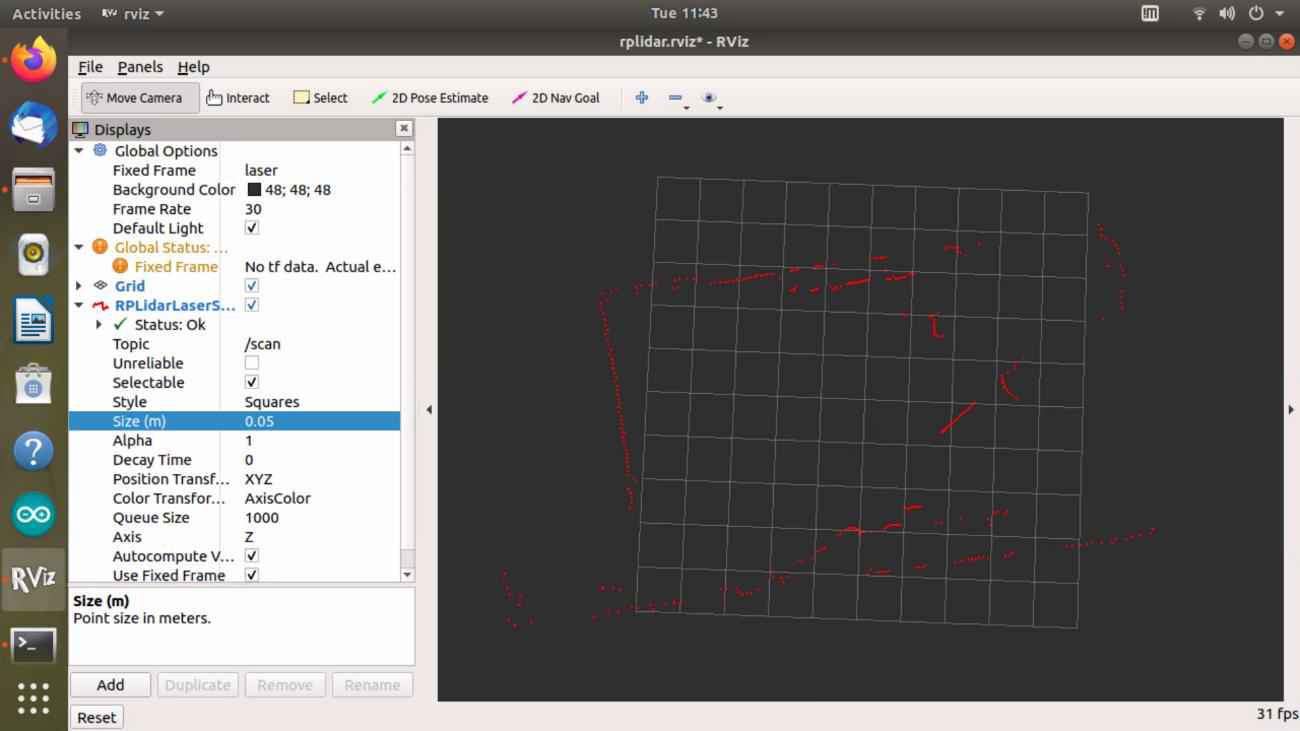

To avoid the warning regarding the fixed frame, you can open a new terminal and execute:

In [ ]:
rosrun tf static_transform_publisher 0 0 0 0 0 0 1 map base_link 10

### How to test Arduino and wheels

To simply test if Arduino is connected to RB computer, you can use the Hello World example from ros_lib library. Connect the Arduino board to your RB computer and open Arduino IDE. 

Open the example, compile it (tick button at the top left corner) and upload it (arrow button at the top left corner) to ArduinoMega2560 board (which is the one that was used during this project). Afterwards run in separate terminals:

In [ ]:
roscore

In [ ]:
rosrun rosserial_python serial_node.py /dev/ttyUSB0 
#USB0 is the port to which the Arduino is connected, change it in case yours is different

In [ ]:
rostopic echo /chatter

Chatter is a topic that should be receiving "hello world!" strings, which you should see though the terminal after executing the last command. 

Now that Arduino is working, let's check if it is correctly connected to the wheels and if the wheels are receiving information to move. 

Close all the terminals. Open "ArduinoROS_Sergi_amb_imu.ino" in Arduino IDE. Compile and upload the script to Arduino2560 board. Now run in separate terminals:

In [ ]:
roscore

In [ ]:
rosrun rosserial_python serial_node.py /dev/ttyUSB0 
#USB0 is the port to which the Arduino is connected, change it in case yours is different

In [ ]:
rostopic pub /cmd_vel geometry_msgs/Twist -r 10 -- '[0.5, 0.0, 0.0]' '[0.0, 0.0, 0.0]'

The last command sends a Twist message to the robot. The wheels should be moving forward. You can try different movements by modifying the numbers inside the brackets: '[vx, vy, vz]' '[wx, wy, wz]', you should only change vx, vy and wz values as the others do not apply. As it is an holonomic robot, if all the values are 0.0 except for wz (angular velocity in z axis) you will obtain a movement in which the robot spins on itself. 

### How to perform autonomous navigation on a real-life robot

Now that we know the hardware is working separately, let's put everything together to obtain an autonomous robot. There are some issues regarding the connection of the LIDAR and Arduino board at the same time, which generates a port collision, but it was proved that the following these steps the navigation works:

- Connect RB Pi to a power supply so that it turns on
- Connect the LIDAR sensor
- Launch the LIDAR node: roslaunch rplidar_ros view_rplidar.launch
- Connect Arduino board
- Run rosserial node: rosrun rosserial_python serial_node.py /dev/ttyUSB1
- Launch the autonomous navigation file for real-life robots: roslaunch rubotcoop_control rubot_nav2.launch

Note that the port of Arduino board has changed from USB0 to USB1. That is due to the order of connection of the LIDAR sensor and the Arduino board. When connecting the LIDAR and executing it, it connects to USB0 port, leaving available the USB1 port for the Arduino board, to which it is connected when it is wired to the RB computer. 

After these instructions, your robot should be performing autonomous navigation and avoiding obstacles!

Also, the terminal shows the minimum distance detected by the LIDAR sensor and displays a warning when it is less than a specified distance on the launch file. 